# **Fuzzy**

In [3]:
pip install scikit-fuzzy


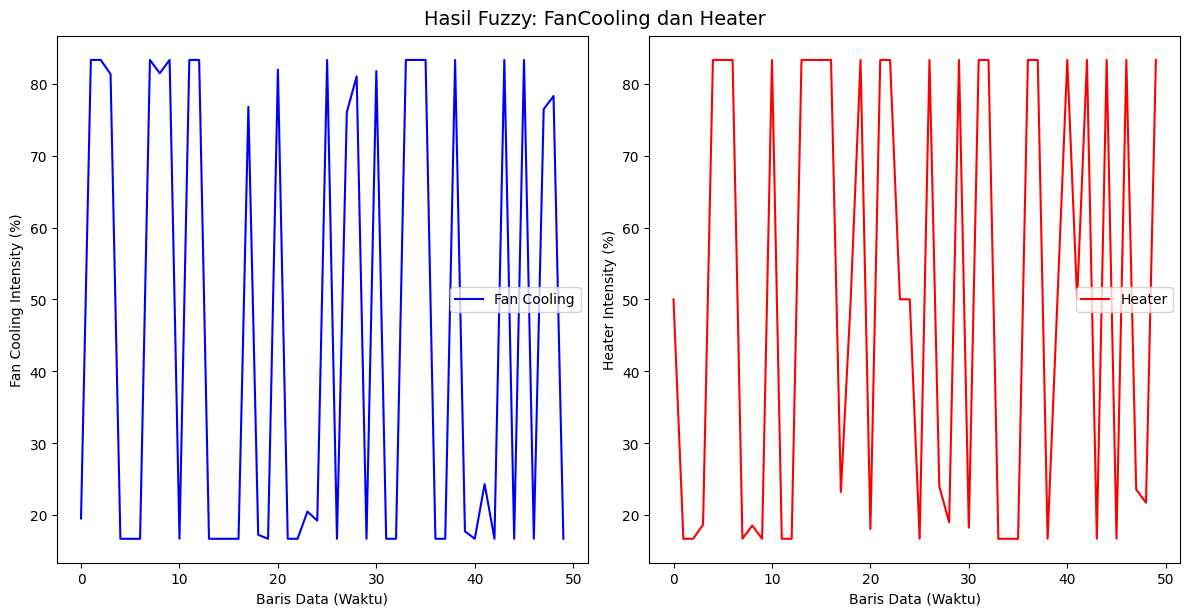

FanCooling Model:
MSE: 302.3852741660926
R2 Score: 0.7042772644145425

Heater Model:
MSE: 189.56643472201017
R2 Score: 0.792950797540686


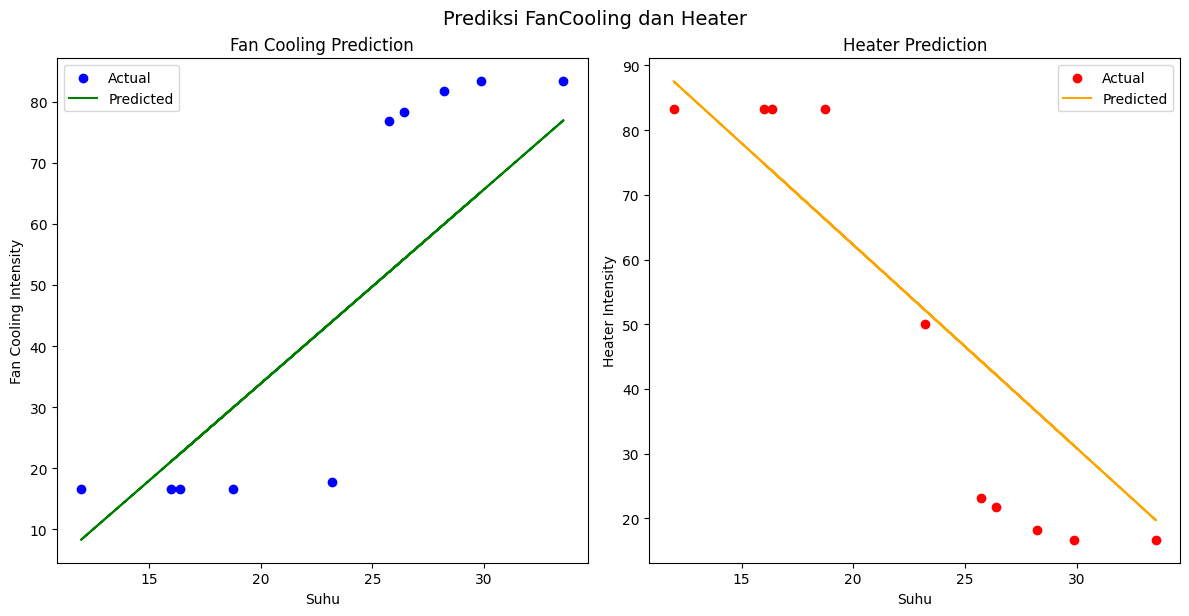

In [19]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Definisi variabel input
suhu = ctrl.Antecedent(np.arange(0, 41, 1), 'Suhu')

# Definisi variabel output
fan_cooling = ctrl.Consequent(np.arange(0, 101, 1), 'FanCooling')
heater = ctrl.Consequent(np.arange(0, 101, 1), 'Heater')

# Fungsi keanggotaan untuk Suhu
suhu['Rendah'] = fuzz.trapmf(suhu.universe, [0, 0, 20, 20])
suhu['Ideal'] = fuzz.trimf(suhu.universe, [20, 22.5, 25])
suhu['Tinggi'] = fuzz.trapmf(suhu.universe, [25, 30, 40, 40])

# Fungsi keanggotaan untuk FanCooling
fan_cooling['Off'] = fuzz.trimf(fan_cooling.universe, [0, 0, 50])
fan_cooling['Medium'] = fuzz.trimf(fan_cooling.universe, [0, 50, 100])
fan_cooling['High'] = fuzz.trimf(fan_cooling.universe, [50, 100, 100])

# Fungsi keanggotaan untuk Heater
heater['Off'] = fuzz.trimf(heater.universe, [0, 0, 50])
heater['Low'] = fuzz.trimf(heater.universe, [0, 50, 100])
heater['High'] = fuzz.trimf(heater.universe, [50, 100, 100])

# Aturan Fuzzy
rule1 = ctrl.Rule(suhu['Rendah'], (fan_cooling['Off'], heater['High']))
rule2 = ctrl.Rule(suhu['Ideal'], (fan_cooling['Off'], heater['Low']))
rule3 = ctrl.Rule(suhu['Tinggi'], (fan_cooling['High'], heater['Off']))

# Sistem kontrol untuk FanCooling dan Heater
cooling_heating_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
cooling_heating = ctrl.ControlSystemSimulation(cooling_heating_ctrl)

# Misalkan data adalah dataframe yang sudah ada
data = pd.read_csv('dummy_data_fuzzy.csv')

# Proses fuzzy untuk setiap baris data
fan_outputs = []
heater_outputs = []

for index, row in data.iterrows():
    # Perhitungan untuk FanCooling dan Heater berdasarkan Suhu
    cooling_heating.input['Suhu'] = row['Suhu']
    cooling_heating.compute()

    # Menyimpan hasil output untuk FanCooling dan Heater
    fan_outputs.append(cooling_heating.output['FanCooling'])
    heater_outputs.append(cooling_heating.output['Heater'])

# Menambahkan output ke data
data['FanCooling'] = fan_outputs
data['Heater'] = heater_outputs

# Visualisasi hasil FanCooling dan Heater
plt.figure(figsize=(12, 6))

# Plot FanCooling
plt.subplot(1, 2, 1)
plt.plot(data.index, data['FanCooling'], 'b-', label='Fan Cooling')
plt.xlabel('Baris Data (Waktu)')
plt.ylabel('Fan Cooling Intensity (%)')
plt.legend()

# Plot Heater
plt.subplot(1, 2, 2)
plt.plot(data.index, data['Heater'], 'r-', label='Heater')
plt.xlabel('Baris Data (Waktu)')
plt.ylabel('Heater Intensity (%)')
plt.legend()

plt.tight_layout()
plt.suptitle('Hasil Fuzzy: FanCooling dan Heater', y=1.02, fontsize=14)
plt.show()

# Predictive Analysis
X = data[['Suhu']]  # Input: Suhu
y_fan = data['FanCooling']  # Target untuk FanCooling
y_heater = data['Heater']  # Target untuk Heater

# Membagi data untuk training dan testing
X_train_fan, X_test_fan, y_train_fan, y_test_fan = train_test_split(X, y_fan, test_size=0.2, random_state=42)
X_train_heater, X_test_heater, y_train_heater, y_test_heater = train_test_split(X, y_heater, test_size=0.2, random_state=42)

# Model regresi linear untuk FanCooling
model_fan = LinearRegression()
model_fan.fit(X_train_fan, y_train_fan)
fan_pred = model_fan.predict(X_test_fan)

# Model regresi linear untuk Heater
model_heater = LinearRegression()
model_heater.fit(X_train_heater, y_train_heater)
heater_pred = model_heater.predict(X_test_heater)

# Evaluasi hasil prediksi
print("FanCooling Model:")
print("MSE:", mean_squared_error(y_test_fan, fan_pred))
print("R2 Score:", r2_score(y_test_fan, fan_pred))

print("\nHeater Model:")
print("MSE:", mean_squared_error(y_test_heater, heater_pred))
print("R2 Score:", r2_score(y_test_heater, heater_pred))

# Visualisasi hasil prediksi
plt.figure(figsize=(12, 6))

# Plot Fan Cooling Prediction
plt.subplot(1, 2, 1)
plt.scatter(X_test_fan, y_test_fan, color='blue', label='Actual')
plt.plot(X_test_fan, fan_pred, color='green', label='Predicted')
plt.xlabel('Suhu')
plt.ylabel('Fan Cooling Intensity')
plt.legend()
plt.title('Fan Cooling Prediction')

# Plot Heater Prediction
plt.subplot(1, 2, 2)
plt.scatter(X_test_heater, y_test_heater, color='red', label='Actual')
plt.plot(X_test_heater, heater_pred, color='orange', label='Predicted')
plt.xlabel('Suhu')
plt.ylabel('Heater Intensity')
plt.legend()
plt.title('Heater Prediction')

plt.tight_layout()
plt.suptitle('Prediksi FanCooling dan Heater', y=1.02, fontsize=14)
plt.show()


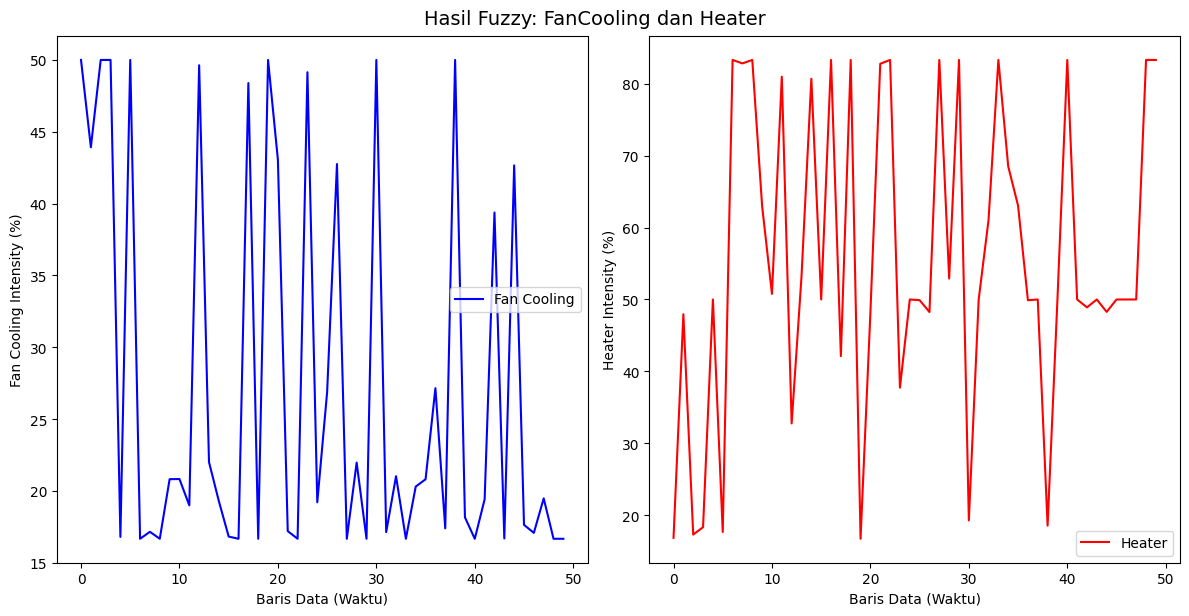

FanCooling Model:
MSE: 55.07947009162242
R2 Score: 0.7113007106981482

Heater Model:
MSE: 75.1293515088272
R2 Score: 0.7719319984254651


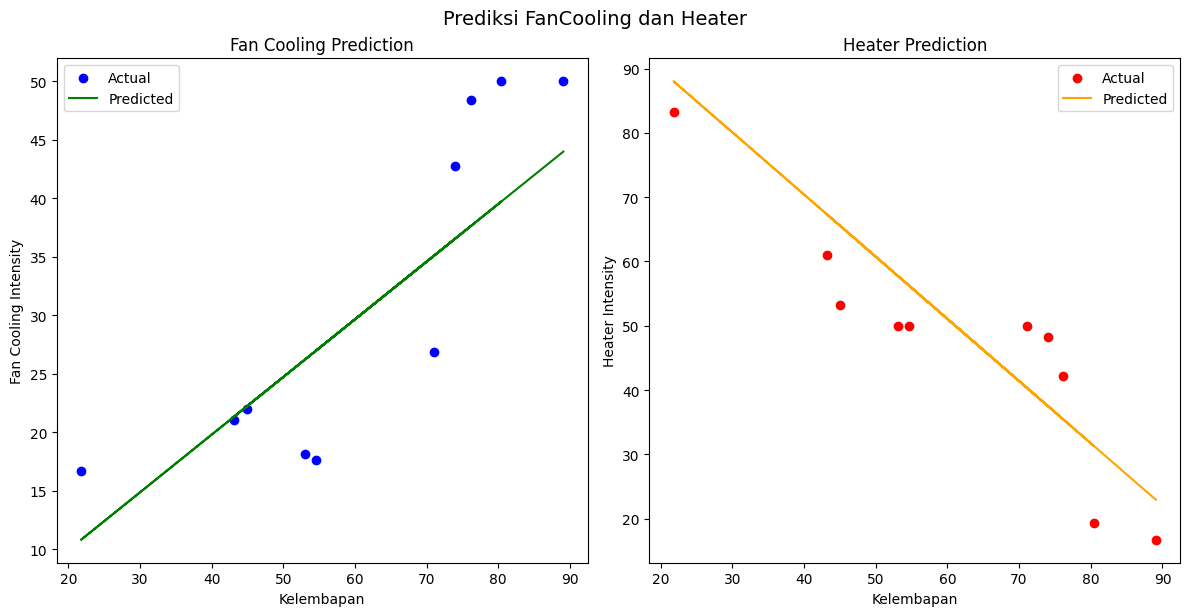

In [20]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Definisi variabel input untuk Kelembapan
kelembapan = ctrl.Antecedent(np.arange(0, 101, 1), 'Kelembapan')

# Definisi variabel output
fan_cooling = ctrl.Consequent(np.arange(0, 101, 1), 'FanCooling')
heater = ctrl.Consequent(np.arange(0, 101, 1), 'Heater')

# Fungsi keanggotaan untuk Kelembapan
kelembapan['Kering'] = fuzz.trapmf(kelembapan.universe, [0, 0, 30, 50])
kelembapan['Ideal'] = fuzz.trimf(kelembapan.universe, [40, 60, 80])
kelembapan['Lembap'] = fuzz.trapmf(kelembapan.universe, [70, 90, 100, 100])

# Fungsi keanggotaan untuk FanCooling
fan_cooling['Off'] = fuzz.trimf(fan_cooling.universe, [0, 0, 50])
fan_cooling['Medium'] = fuzz.trimf(fan_cooling.universe, [0, 50, 100])
fan_cooling['High'] = fuzz.trimf(fan_cooling.universe, [50, 100, 100])

# Fungsi keanggotaan untuk Heater
heater['Off'] = fuzz.trimf(heater.universe, [0, 0, 50])
heater['Low'] = fuzz.trimf(heater.universe, [0, 50, 100])
heater['High'] = fuzz.trimf(heater.universe, [50, 100, 100])

# Aturan Fuzzy
rule1 = ctrl.Rule(kelembapan['Kering'], (fan_cooling['Off'], heater['High']))
rule2 = ctrl.Rule(kelembapan['Ideal'], (fan_cooling['Off'], heater['Low']))
rule3 = ctrl.Rule(kelembapan['Lembap'], (fan_cooling['Medium'], heater['Off']))

# Sistem kontrol untuk FanCooling dan Heater
cooling_heating_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
cooling_heating = ctrl.ControlSystemSimulation(cooling_heating_ctrl)

# Membaca data dari CSV
data = pd.read_csv('dummy_data_fuzzy.csv')

# Proses fuzzy untuk setiap baris data
fan_outputs = []
heater_outputs = []

for index, row in data.iterrows():
    # Perhitungan untuk FanCooling dan Heater berdasarkan Kelembapan
    cooling_heating.input['Kelembapan'] = row['Kelembapan']
    cooling_heating.compute()

    # Menyimpan hasil output untuk FanCooling dan Heater
    fan_outputs.append(cooling_heating.output['FanCooling'])
    heater_outputs.append(cooling_heating.output['Heater'])

# Menambahkan output ke data
data['FanCooling'] = fan_outputs
data['Heater'] = heater_outputs

# Visualisasi hasil fuzzy
plt.figure(figsize=(12, 6))

# Plot FanCooling
plt.subplot(1, 2, 1)
plt.plot(data.index, data['FanCooling'], 'b-', label='Fan Cooling')
plt.xlabel('Baris Data (Waktu)')
plt.ylabel('Fan Cooling Intensity (%)')
plt.legend()

# Plot Heater
plt.subplot(1, 2, 2)
plt.plot(data.index, data['Heater'], 'r-', label='Heater')
plt.xlabel('Baris Data (Waktu)')
plt.ylabel('Heater Intensity (%)')
plt.legend()

plt.tight_layout()
plt.suptitle('Hasil Fuzzy: FanCooling dan Heater', y=1.02, fontsize=14)
plt.show()

# Predictive Analysis
X = data[['Kelembapan']]  # Input: Kelembapan
y_fan = data['FanCooling']  # Target untuk FanCooling
y_heater = data['Heater']  # Target untuk Heater

# Membagi data untuk training dan testing
X_train_fan, X_test_fan, y_train_fan, y_test_fan = train_test_split(X, y_fan, test_size=0.2, random_state=42)
X_train_heater, X_test_heater, y_train_heater, y_test_heater = train_test_split(X, y_heater, test_size=0.2, random_state=42)

# Model regresi linear untuk FanCooling
model_fan = LinearRegression()
model_fan.fit(X_train_fan, y_train_fan)
fan_pred = model_fan.predict(X_test_fan)

# Model regresi linear untuk Heater
model_heater = LinearRegression()
model_heater.fit(X_train_heater, y_train_heater)
heater_pred = model_heater.predict(X_test_heater)

# Evaluasi hasil prediksi
print("FanCooling Model:")
print("MSE:", mean_squared_error(y_test_fan, fan_pred))
print("R2 Score:", r2_score(y_test_fan, fan_pred))

print("\nHeater Model:")
print("MSE:", mean_squared_error(y_test_heater, heater_pred))
print("R2 Score:", r2_score(y_test_heater, heater_pred))

# Visualisasi hasil prediksi
plt.figure(figsize=(12, 6))

# Plot Fan Cooling Prediction
plt.subplot(1, 2, 1)
plt.scatter(X_test_fan, y_test_fan, color='blue', label='Actual')
plt.plot(X_test_fan, fan_pred, color='green', label='Predicted')
plt.xlabel('Kelembapan')
plt.ylabel('Fan Cooling Intensity')
plt.legend()
plt.title('Fan Cooling Prediction')

# Plot Heater Prediction
plt.subplot(1, 2, 2)
plt.scatter(X_test_heater, y_test_heater, color='red', label='Actual')
plt.plot(X_test_heater, heater_pred, color='orange', label='Predicted')
plt.xlabel('Kelembapan')
plt.ylabel('Heater Intensity')
plt.legend()
plt.title('Heater Prediction')

plt.tight_layout()
plt.suptitle('Prediksi FanCooling dan Heater', y=1.02, fontsize=14)
plt.show()


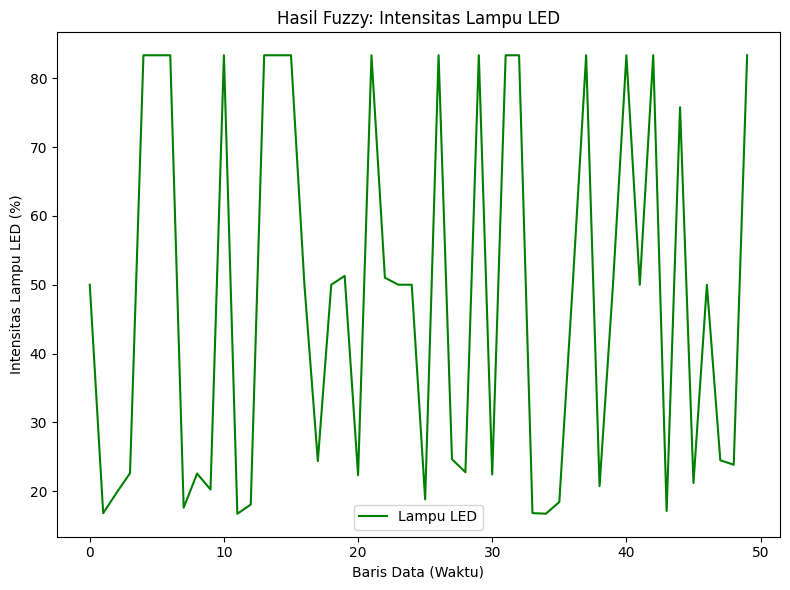

MSE: 132.35021665892705
R2 Score: 0.8133936486537794


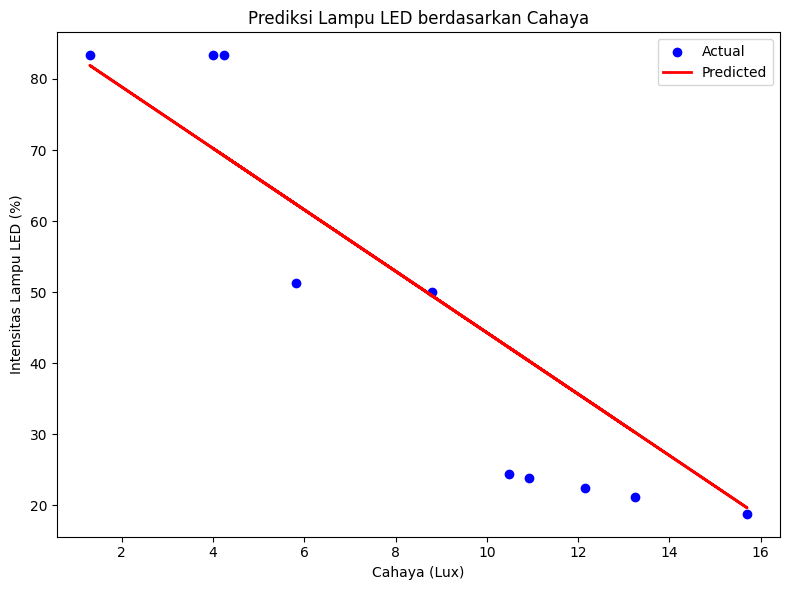

In [21]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Definisi variabel input untuk Cahaya (Lux)
cahaya = ctrl.Antecedent(np.arange(0, 21, 1), 'Cahaya')

# Definisi variabel output untuk Intensitas Lampu LED
lampu_led = ctrl.Consequent(np.arange(0, 101, 1), 'LampuLED')

# Fungsi keanggotaan untuk Cahaya
cahaya['Gelap'] = fuzz.trapmf(cahaya.universe, [0, 0, 5, 5])
cahaya['Ideal'] = fuzz.trimf(cahaya.universe, [5, 7.5, 10])
cahaya['Terang'] = fuzz.trapmf(cahaya.universe, [10, 20, 20, 20])

# Fungsi keanggotaan untuk Lampu LED
lampu_led['Off'] = fuzz.trimf(lampu_led.universe, [0, 0, 50])
lampu_led['Medium'] = fuzz.trimf(lampu_led.universe, [0, 50, 100])
lampu_led['High'] = fuzz.trimf(lampu_led.universe, [50, 100, 100])

# Aturan Fuzzy
rule1 = ctrl.Rule(cahaya['Gelap'], lampu_led['High'])
rule2 = ctrl.Rule(cahaya['Ideal'], lampu_led['Medium'])
rule3 = ctrl.Rule(cahaya['Terang'], lampu_led['Off'])

# Sistem kontrol untuk Lampu LED
lampu_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
lampu_sim = ctrl.ControlSystemSimulation(lampu_ctrl)

# Membaca data dari CSV
data = pd.read_csv('dummycahaya.csv')

# Proses fuzzy untuk setiap baris data
lampu_outputs = []

for index, row in data.iterrows():
    # Perhitungan untuk Lampu LED berdasarkan Cahaya
    lampu_sim.input['Cahaya'] = row['Cahaya']
    lampu_sim.compute()

    # Menyimpan hasil output untuk Lampu LED
    lampu_outputs.append(lampu_sim.output['LampuLED'])

# Menambahkan output ke data
data['LampuLED'] = lampu_outputs

# Visualisasi hasil fuzzy
plt.figure(figsize=(8, 6))

# Plot Lampu LED
plt.plot(data.index, data['LampuLED'], 'g-', label='Lampu LED')
plt.xlabel('Baris Data (Waktu)')
plt.ylabel('Intensitas Lampu LED (%)')
plt.legend()
plt.title('Hasil Fuzzy: Intensitas Lampu LED')
plt.tight_layout()
plt.show()

# Analisis Prediktif
X = data[['Cahaya']]  # Input: Cahaya
y = data['LampuLED']  # Target: Lampu LED

# Membagi data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluasi model
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# Visualisasi hasil prediksi
plt.figure(figsize=(8, 6))

# Plot Prediksi Lampu LED
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted', linewidth=2)
plt.xlabel('Cahaya (Lux)')
plt.ylabel('Intensitas Lampu LED (%)')
plt.legend()
plt.title('Prediksi Lampu LED berdasarkan Cahaya')
plt.tight_layout()
plt.show()


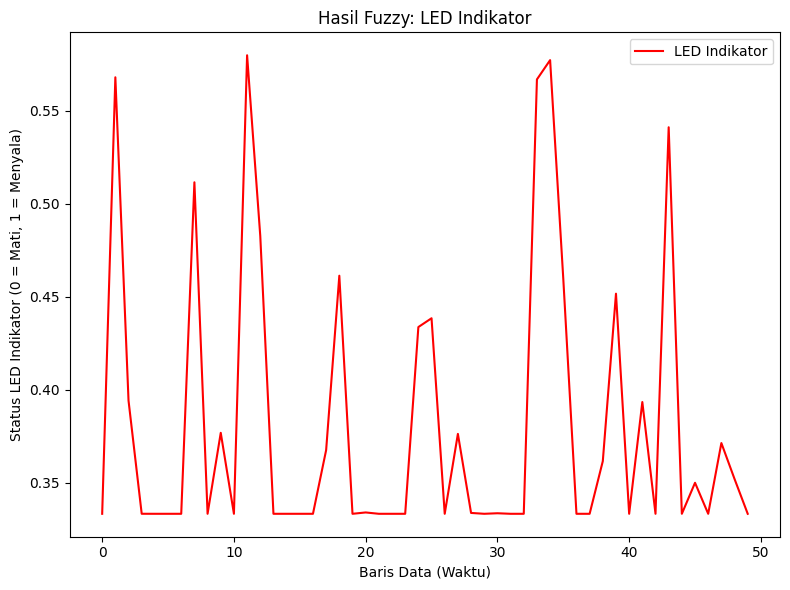

Accuracy: 1.0
Confusion Matrix:
 [[10]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


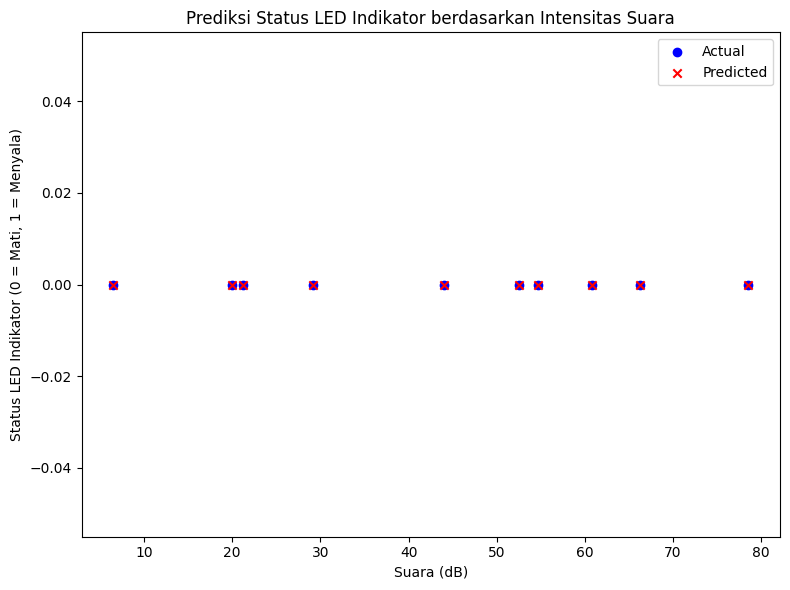

In [23]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Definisi variabel input untuk Intensitas Suara (dB)
suara = ctrl.Antecedent(np.arange(0, 121, 1), 'Suara')

# Definisi variabel output untuk LED Indikator (Status)
led_indikator = ctrl.Consequent(np.arange(0, 2, 1), 'LEDIndikator')

# Fungsi keanggotaan untuk Suara
suara['Rendah'] = fuzz.trapmf(suara.universe, [0, 0, 40, 40])
suara['Aman'] = fuzz.trimf(suara.universe, [40, 60, 85])
suara['Berbahaya'] = fuzz.trapmf(suara.universe, [85, 120, 120, 120])

# Fungsi keanggotaan untuk LED Indikator
led_indikator['Off'] = fuzz.trimf(led_indikator.universe, [0, 0, 1])
led_indikator['On'] = fuzz.trimf(led_indikator.universe, [0, 1, 1])

# Aturan Fuzzy
rule1 = ctrl.Rule(suara['Rendah'] | suara['Aman'], led_indikator['Off'])
rule2 = ctrl.Rule(suara['Berbahaya'], led_indikator['On'])

# Sistem kontrol untuk LED Indikator
led_ctrl = ctrl.ControlSystem([rule1, rule2])
led_sim = ctrl.ControlSystemSimulation(led_ctrl)

# Membaca data dari CSV
data = pd.read_csv('deteksi_kebisingan_dummy.csv')

# Proses fuzzy untuk setiap baris data
led_outputs = []

for index, row in data.iterrows():
    # Perhitungan untuk LED Indikator berdasarkan Suara
    led_sim.input['Suara'] = row['Suara']
    led_sim.compute()

    # Menyimpan hasil output untuk LED Indikator
    led_outputs.append(led_sim.output['LEDIndikator'])

# Menambahkan output ke data
data['LEDIndikator'] = led_outputs

# Visualisasi hasil fuzzy
plt.figure(figsize=(8, 6))
plt.plot(data.index, data['LEDIndikator'], 'r-', label='LED Indikator')
plt.xlabel('Baris Data (Waktu)')
plt.ylabel('Status LED Indikator (0 = Mati, 1 = Menyala)')
plt.legend()
plt.title('Hasil Fuzzy: LED Indikator')
plt.tight_layout()
plt.show()

# Analisis Prediktif
X = data[['Suara']]  # Input: Suara
y = (data['LEDIndikator'] > 0.5).astype(int)  # Target biner untuk prediksi (0 atau 1)

# Membagi data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model regresi logistik
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluasi model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualisasi hasil prediksi
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted', marker='x')
plt.xlabel('Suara (dB)')
plt.ylabel('Status LED Indikator (0 = Mati, 1 = Menyala)')
plt.legend()
plt.title('Prediksi Status LED Indikator berdasarkan Intensitas Suara')
plt.tight_layout()
plt.show()


Output motor_servo pada index 0: {}
Error: 'MotorServo' tidak ditemukan pada index 0
Output motor_servo pada index 1: {'MotorServo': 20.54105332561818}
Output motor_servo pada index 2: {'MotorServo': 20.54105332561818}
Output motor_servo pada index 3: {'MotorServo': 20.54105332561818}
Output motor_servo pada index 4: {'MotorServo': 16.679716752669126}
Output motor_servo pada index 5: {'MotorServo': 16.679716752669126}
Output motor_servo pada index 6: {'MotorServo': 83.33333333333336}
Output motor_servo pada index 7: {'MotorServo': 83.33333333333336}
Output motor_servo pada index 8: {'MotorServo': 83.33333333333336}
Output motor_servo pada index 9: {'MotorServo': 23.406776326862197}
Output motor_servo pada index 10: {'MotorServo': 21.049157645547655}
Output motor_servo pada index 11: {'MotorServo': 83.33333333333336}
Output motor_servo pada index 12: {'MotorServo': 22.463899821109134}
Output motor_servo pada index 13: {'MotorServo': 22.203923846725782}
Output motor_servo pada index 14: 

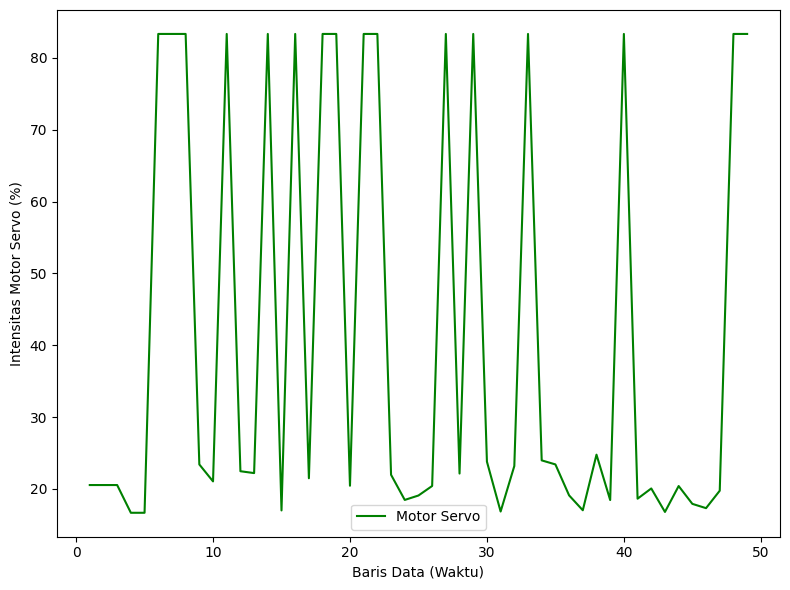

In [27]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd
import matplotlib.pyplot as plt

# Definisi variabel input untuk Berat Pakan (gram)
berat_pakan = ctrl.Antecedent(np.arange(0, 626, 1), 'BeratPakan')

# Definisi variabel output untuk Motor Servo Activation (%)
motor_servo = ctrl.Consequent(np.arange(0, 101, 1), 'MotorServo')

# Fungsi keanggotaan untuk Berat Pakan
berat_pakan['Rendah'] = fuzz.trapmf(berat_pakan.universe, [0, 0, 200, 200])  # Berat pakan rendah
berat_pakan['Ideal'] = fuzz.trimf(berat_pakan.universe, [200, 412.5, 625])  # Berat pakan ideal

# Fungsi keanggotaan untuk Motor Servo
motor_servo['Off'] = fuzz.trimf(motor_servo.universe, [0, 0, 50])  # Motor servo mati
motor_servo['On'] = fuzz.trimf(motor_servo.universe, [50, 100, 100])  # Motor servo aktif penuh

# Aturan Fuzzy
rule1 = ctrl.Rule(berat_pakan['Rendah'], motor_servo['On'])  # Jika berat pakan rendah, motor servo aktif
rule2 = ctrl.Rule(berat_pakan['Ideal'], motor_servo['Off'])  # Jika berat pakan ideal, motor servo mati

# Sistem kontrol untuk Motor Servo
servo_ctrl = ctrl.ControlSystem([rule1, rule2])
servo_sim = ctrl.ControlSystemSimulation(servo_ctrl)

# Misalkan data adalah dataframe yang sudah ada
data = pd.read_csv('berat_pakan_dummy.csv')  # Sesuaikan dengan nama file Anda

# Proses fuzzy untuk setiap baris data
motor_servo_outputs = []  # Inisialisasi ulang motor_servo_outputs

for index, row in data.iterrows():
    # Perhitungan untuk Motor Servo berdasarkan Berat Pakan
    servo_sim.input['BeratPakan'] = row['BeratPakan']
    servo_sim.compute()

    # Cek apakah output tersedia
    print(f"Output motor_servo pada index {index}: {servo_sim.output}")

    # Menyimpan hasil output untuk Motor Servo jika key ada
    if 'MotorServo' in servo_sim.output:
        motor_servo_outputs.append(servo_sim.output['MotorServo'])
    else:
        print(f"Error: 'MotorServo' tidak ditemukan pada index {index}")
        motor_servo_outputs.append(np.nan)  # Menambahkan nilai NaN untuk data yang gagal

# Menambahkan output ke data dan menyimpan kembali
data['MotorServo'] = motor_servo_outputs
data.to_csv('output_data_motor_servo.csv', index=False)

# Visualisasi hasil dalam Time Series menggunakan Indeks Baris
plt.figure(figsize=(8, 6))

# Plot Motor Servo
plt.plot(data.index, data['MotorServo'], 'g-', label='Motor Servo')
plt.xlabel('Baris Data (Waktu)')
plt.ylabel('Intensitas Motor Servo (%)')
plt.legend()

plt.tight_layout()
plt.show()


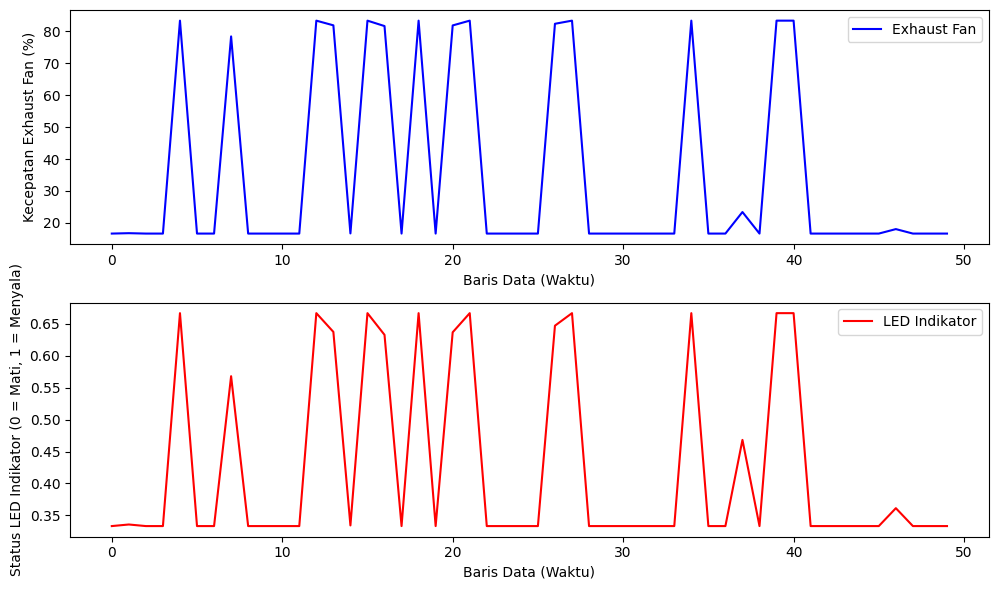

Exhaust Fan Model:
MSE: 265.8562507170697
R2 Score: 0.7080818994271649

LED Indikator Model:
MSE: 0.005978577564673997
R2 Score: 0.7172947979999624


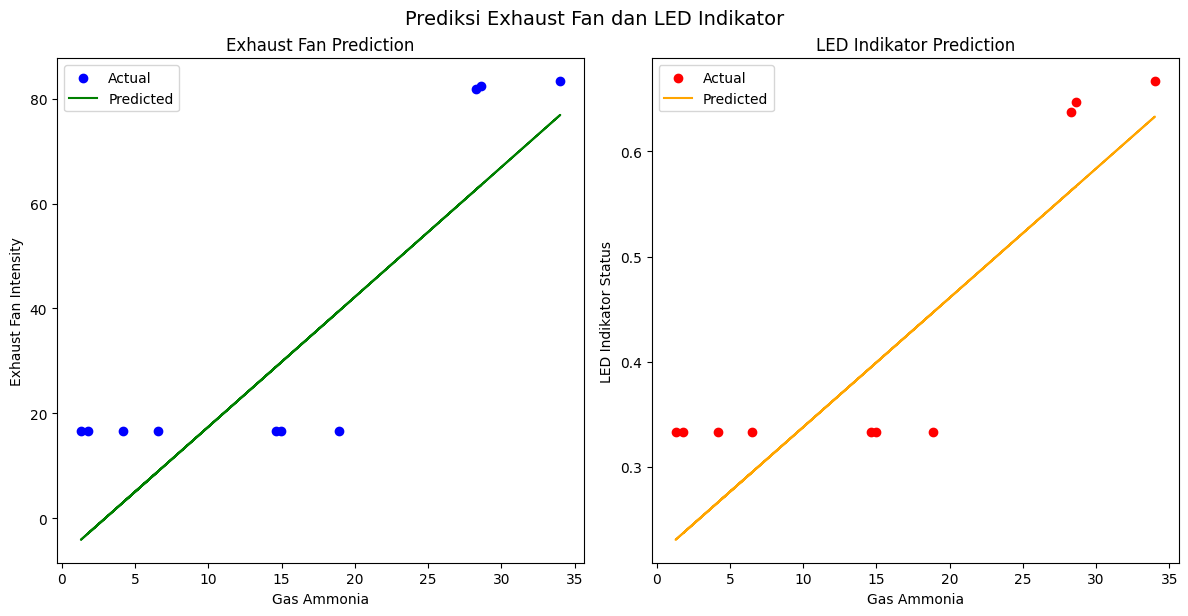

In [30]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Definisi variabel input untuk Kadar Gas Ammonia (ppm)
gas_ammonia = ctrl.Antecedent(np.arange(0, 31, 1), 'GasAmmonia')

# Definisi variabel output untuk Exhaust Fan Speed (%) dan LED Indikator (Status)
exhaust_fan = ctrl.Consequent(np.arange(0, 101, 1), 'ExhaustFan')
led_indikator = ctrl.Consequent(np.arange(0, 2, 1), 'LEDIndikator')

# Fungsi keanggotaan untuk Kadar Gas Ammonia
gas_ammonia['Rendah'] = fuzz.trapmf(gas_ammonia.universe, [0, 0, 20, 20])  # Kadar gas rendah
gas_ammonia['Aman'] = fuzz.trimf(gas_ammonia.universe, [20, 22, 25])  # Kadar gas aman
gas_ammonia['Berbahaya'] = fuzz.trapmf(gas_ammonia.universe, [25, 30, 30, 30])  # Kadar gas berbahaya

# Fungsi keanggotaan untuk Exhaust Fan dan LED Indikator
exhaust_fan['Off'] = fuzz.trimf(exhaust_fan.universe, [0, 0, 50])  # Exhaust fan mati
exhaust_fan['On'] = fuzz.trimf(exhaust_fan.universe, [50, 100, 100])  # Exhaust fan aktif penuh

led_indikator['Off'] = fuzz.trimf(led_indikator.universe, [0, 0, 1])  # LED mati
led_indikator['On'] = fuzz.trimf(led_indikator.universe, [0, 1, 1])  # LED menyala

# Aturan Fuzzy untuk Exhaust Fan dan LED Indikator
rule1 = ctrl.Rule(gas_ammonia['Rendah'] | gas_ammonia['Aman'],
                  (exhaust_fan['Off'], led_indikator['Off']))  # Jika gas amonia rendah atau aman, maka exhaust fan mati dan LED mati
rule2 = ctrl.Rule(gas_ammonia['Berbahaya'],
                  (exhaust_fan['On'], led_indikator['On']))  # Jika gas amonia berbahaya, maka exhaust fan aktif dan LED menyala

# Sistem kontrol untuk Exhaust Fan dan LED Indikator
fan_led_ctrl = ctrl.ControlSystem([rule1, rule2])
fan_led_sim = ctrl.ControlSystemSimulation(fan_led_ctrl)

# Misalkan data adalah dataframe yang sudah ada
data = pd.read_csv('gasammonia_dummy.csv')  # Sesuaikan dengan nama file Anda

# Proses fuzzy untuk setiap baris data
fan_outputs = []  # Inisialisasi ulang exhaust fan outputs
led_outputs = []  # Inisialisasi ulang led outputs

for index, row in data.iterrows():
    # Perhitungan untuk Exhaust Fan dan LED Indikator berdasarkan Kadar Gas Ammonia
    fan_led_sim.input['GasAmmonia'] = row['GasAmmonia']
    fan_led_sim.compute()

    # Menyimpan hasil output untuk Exhaust Fan dan LED Indikator
    fan_outputs.append(fan_led_sim.output['ExhaustFan'])
    led_outputs.append(fan_led_sim.output['LEDIndikator'])

# Menambahkan output ke data
data['ExhaustFan'] = fan_outputs
data['LEDIndikator'] = led_outputs

# Visualisasi hasil dalam Time Series menggunakan Indeks Baris
plt.figure(figsize=(10, 6))

# Plot Exhaust Fan
plt.subplot(2, 1, 1)
plt.plot(data.index, data['ExhaustFan'], 'b-', label='Exhaust Fan')
plt.xlabel('Baris Data (Waktu)')
plt.ylabel('Kecepatan Exhaust Fan (%)')
plt.legend()

# Plot LED Indikator
plt.subplot(2, 1, 2)
plt.plot(data.index, data['LEDIndikator'], 'r-', label='LED Indikator')
plt.xlabel('Baris Data (Waktu)')
plt.ylabel('Status LED Indikator (0 = Mati, 1 = Menyala)')
plt.legend()

plt.tight_layout()
plt.show()

# Predictive Analysis
X = data[['GasAmmonia']]  # Input: GasAmmonia
y_fan = data['ExhaustFan']  # Target untuk Exhaust Fan
y_led = data['LEDIndikator']  # Target untuk LED Indikator

# Membagi data untuk training dan testing
X_train_fan, X_test_fan, y_train_fan, y_test_fan = train_test_split(X, y_fan, test_size=0.2, random_state=42)
X_train_led, X_test_led, y_train_led, y_test_led = train_test_split(X, y_led, test_size=0.2, random_state=42)

# Model regresi linear untuk Exhaust Fan
model_fan = LinearRegression()
model_fan.fit(X_train_fan, y_train_fan)
fan_pred = model_fan.predict(X_test_fan)

# Model regresi linear untuk LED Indikator
model_led = LinearRegression()
model_led.fit(X_train_led, y_train_led)
led_pred = model_led.predict(X_test_led)

# Evaluasi hasil prediksi
print("Exhaust Fan Model:")
print("MSE:", mean_squared_error(y_test_fan, fan_pred))
print("R2 Score:", r2_score(y_test_fan, fan_pred))

print("\nLED Indikator Model:")
print("MSE:", mean_squared_error(y_test_led, led_pred))
print("R2 Score:", r2_score(y_test_led, led_pred))

# Visualisasi hasil prediksi
plt.figure(figsize=(12, 6))

# Plot Exhaust Fan Prediction
plt.subplot(1, 2, 1)
plt.scatter(X_test_fan, y_test_fan, color='blue', label='Actual')
plt.plot(X_test_fan, fan_pred, color='green', label='Predicted')
plt.xlabel('Gas Ammonia')
plt.ylabel('Exhaust Fan Intensity')
plt.legend()
plt.title('Exhaust Fan Prediction')

# Plot LED Indikator Prediction
plt.subplot(1, 2, 2)
plt.scatter(X_test_led, y_test_led, color='red', label='Actual')
plt.plot(X_test_led, led_pred, color='orange', label='Predicted')
plt.xlabel('Gas Ammonia')
plt.ylabel('LED Indikator Status')
plt.legend()
plt.title('LED Indikator Prediction')

plt.tight_layout()
plt.suptitle('Prediksi Exhaust Fan dan LED Indikator', y=1.02, fontsize=14)
plt.show()


# **NEURAL NETWORK**

In [11]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load updated data
data = pd.read_csv('updated_dummy_data_fuzzy.csv')

# Features (Suhu, Kelembapan) and Targets (FanCooling, Heater)
X = data[['Suhu', 'Kelembapan']].values
y = data[['FanCooling', 'Heater']].values

# Scale data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Define the NN model
model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(10, activation='relu'),
    Dense(2, activation='linear')  # Output layer with 2 outputs (FanCooling, Heater)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}, Test MAE: {mae}")

# Predict on new data
predictions_scaled = model.predict(X_test)
predictions = scaler_y.inverse_transform(predictions_scaled)

# Display predictions vs actual values
for i in range(5):  # Show 5 predictions
    print(f"Input: {scaler_X.inverse_transform([X_test[i]])[0]}")
    print(f"Predicted: {predictions[i]}, Actual: {scaler_y.inverse_transform([y_test[i]])[0]}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - loss: 0.2797 - mae: 0.3822 - val_loss: 0.2281 - val_mae: 0.3476
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2296 - mae: 0.3363 - val_loss: 0.2217 - val_mae: 0.3395
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2414 - mae: 0.3453 - val_loss: 0.2156 - val_mae: 0.3320
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2314 - mae: 0.3356 - val_loss: 0.2097 - val_mae: 0.3254
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2080 - mae: 0.3146 - val_loss: 0.2041 - val_mae: 0.3190
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.2299 - mae: 0.3278 - val_loss: 0.1987 - val_mae: 0.3127
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2245 - mae: 0.3189 - val_loss: 0.1936 - val_mae: 0.3067
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.2279 - mae: 0.3201 - val_loss: 0.1890 - val_mae: 0.3008
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2067 - mae:

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


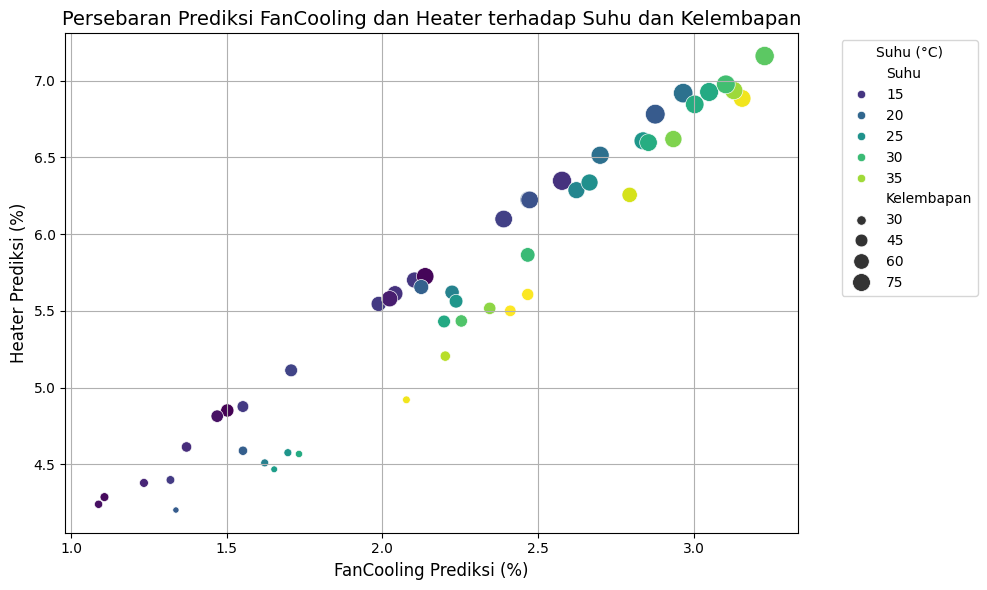

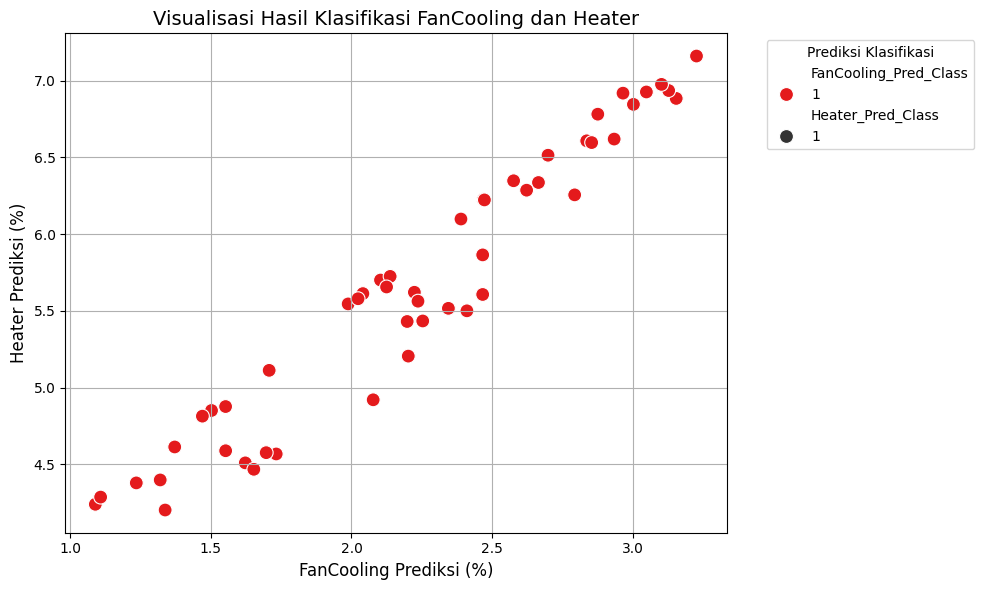

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Load dataset
data = pd.read_csv('updated_dummy_data_fuzzy.csv')

# Preprocessing data
X = data[['Suhu', 'Kelembapan']].values
y_fan_cooling = data['FanCooling'].values
y_heater = data['Heater'].values

# Normalisasi data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi training dan testing
X_train, X_test, y_fan_train, y_fan_test, y_heat_train, y_heat_test = train_test_split(
    X_scaled, y_fan_cooling, y_heater, test_size=0.2, random_state=42
)

# Model untuk FanCooling
model_fan = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(10, activation='relu'),
    Dense(1, activation='linear')
])
model_fan.compile(optimizer='adam', loss='mse')
model_fan.fit(X_train, y_fan_train, epochs=100, verbose=0)

# Model untuk Heater
model_heater = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(10, activation='relu'),
    Dense(1, activation='linear')
])
model_heater.compile(optimizer='adam', loss='mse')
model_heater.fit(X_train, y_heat_train, epochs=100, verbose=0)

# Prediksi pada data asli
pred_fan_cooling = model_fan.predict(X_scaled).flatten()
pred_heater = model_heater.predict(X_scaled).flatten()

# Menambahkan hasil prediksi ke dalam dataset
data['FanCooling_Pred'] = pred_fan_cooling
data['Heater_Pred'] = pred_heater

# Plot persebaran prediksi FanCooling dan Heater terhadap Suhu dan Kelembapan
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='FanCooling_Pred', y='Heater_Pred', hue='Suhu', palette='viridis', size='Kelembapan', sizes=(20, 200))
plt.title('Persebaran Prediksi FanCooling dan Heater terhadap Suhu dan Kelembapan', fontsize=14)
plt.xlabel('FanCooling Prediksi (%)', fontsize=12)
plt.ylabel('Heater Prediksi (%)', fontsize=12)
plt.legend(title='Suhu (°C)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Prediksi Klasifikasi Berdasarkan Threshold
threshold_fan = 0.5  # Definisikan threshold untuk klasifikasi (misalnya, 50%)
threshold_heater = 0.5  # Definisikan threshold untuk klasifikasi (misalnya, 50%)

# Klasifikasikan hasil prediksi berdasarkan threshold
y_fan_pred_class = (pred_fan_cooling > threshold_fan).astype(int)
y_heat_pred_class = (pred_heater > threshold_heater).astype(int)

# Menambahkan hasil klasifikasi ke dalam dataset
data['FanCooling_Pred_Class'] = y_fan_pred_class
data['Heater_Pred_Class'] = y_heat_pred_class

# Visualisasi hasil klasifikasi FanCooling dan Heater
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='FanCooling_Pred', y='Heater_Pred', hue='FanCooling_Pred_Class', style='Heater_Pred_Class', palette='Set1', s=100)
plt.title('Visualisasi Hasil Klasifikasi FanCooling dan Heater', fontsize=14)
plt.xlabel('FanCooling Prediksi (%)', fontsize=12)
plt.ylabel('Heater Prediksi (%)', fontsize=12)
plt.legend(title='Prediksi Klasifikasi', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [43]:
from sklearn.metrics import accuracy_score, classification_report

# Mengubah nilai target asli menjadi biner (berdasarkan threshold yang digunakan untuk prediksi)
threshold_fan = 0.5
threshold_heater = 0.5

# Kategorikan target asli berdasarkan threshold yang sama
y_fan_class = (data['FanCooling'] > threshold_fan).astype(int)
y_heater_class = (data['Heater'] > threshold_heater).astype(int)

# Evaluasi Klasifikasi menggunakan classification_report dan accuracy_score
print("Laporan Klasifikasi untuk FanCooling:")
print(classification_report(y_fan_class, y_fan_pred_class))

print("Laporan Klasifikasi untuk Heater:")
print(classification_report(y_heater_class, y_heat_pred_class))

# Menampilkan akurasi prediksi klasifikasi
print(f"Akurasi untuk FanCooling: {accuracy_score(y_fan_class, y_fan_pred_class):.4f}")
print(f"Akurasi untuk Heater: {accuracy_score(y_heater_class, y_heat_pred_class):.4f}")


Laporan Klasifikasi untuk FanCooling:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.56      1.00      0.72        28

    accuracy                           0.56        50
   macro avg       0.28      0.50      0.36        50
weighted avg       0.31      0.56      0.40        50

Laporan Klasifikasi untuk Heater:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.44      1.00      0.61        22

    accuracy                           0.44        50
   macro avg       0.22      0.50      0.31        50
weighted avg       0.19      0.44      0.27        50

Akurasi untuk FanCooling: 0.5600
Akurasi untuk Heater: 0.4400


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


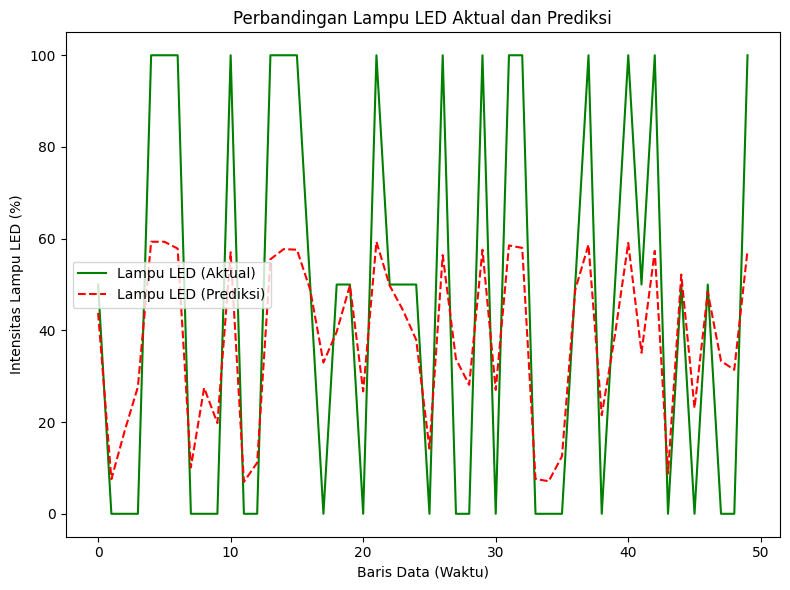

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Load dataset
data = pd.read_csv('dummycahaya.csv')  # Pastikan file dummycahaya.csv tersedia

# Preprocessing data
X = data[['Cahaya']].values  # Input: Cahaya
y = data['LampuLED'].values  # Output: Intensitas Lampu LED

# Normalisasi data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Membuat model Neural Network
model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(10, activation='relu'),
    Dense(1, activation='linear')  # Output: Lampu LED
])

# Compile model
model.compile(optimizer='adam', loss='mse')

# Train model
model.fit(X_train, y_train, epochs=100, verbose=0)

# Prediksi pada data asli
y_pred_scaled = model.predict(X_scaled).flatten()

# Denormalisasi hasil prediksi
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Menambahkan output prediksi ke data dan menyimpan
data['LampuLED_Pred'] = y_pred
data.to_csv('output_data_lampu_nn.csv', index=False)

# Visualisasi hasil prediksi dalam Time Series
plt.figure(figsize=(8, 6))

# Plot Lampu LED (Aktual vs Prediksi)
plt.plot(data.index, data['LampuLED'], 'g-', label='Lampu LED (Aktual)')
plt.plot(data.index, data['LampuLED_Pred'], 'r--', label='Lampu LED (Prediksi)')
plt.xlabel('Baris Data (Waktu)')
plt.ylabel('Intensitas Lampu LED (%)')
plt.legend()
plt.title('Perbandingan Lampu LED Aktual dan Prediksi')
plt.tight_layout()
plt.show()


Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8933 - loss: 0.6720  
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8933 - loss: 0.6452 
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8850 - loss: 0.6254 
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8419 - loss: 0.6200 
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8683 - loss: 0.5881 
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8850 - loss: 0.5702 
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8781 - loss: 0.5504 
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8989 - loss: 0.5211 
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8753 - loss: 0.5187 
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8808 - loss: 0.4995 
Epoch 11/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8781 - loss: 0.4845 
Epoch 12/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8975 - loss: 0.4570 


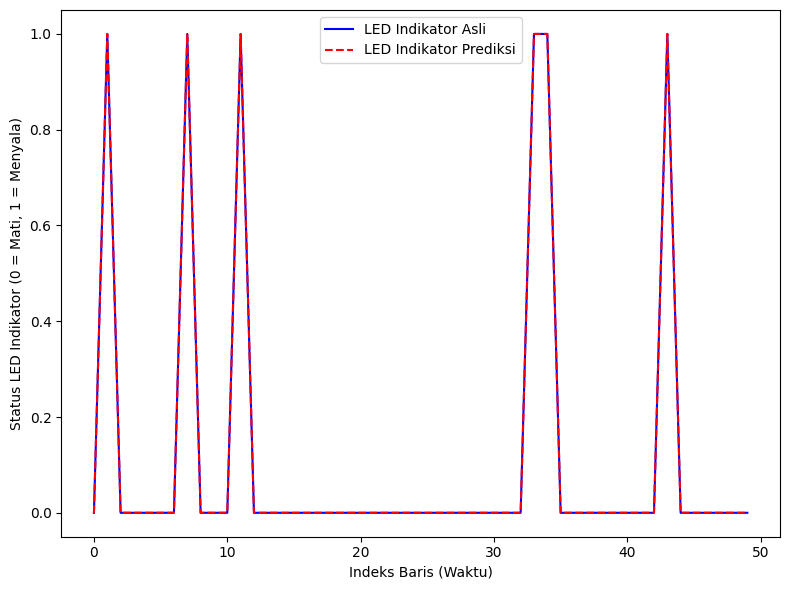

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Membaca data dari file CSV
data = pd.read_csv('deteksi_kebisingan_dummy.csv')

# Menentukan input (Suara) dan output (LED Indikator)
X = data['Suara'].values.reshape(-1, 1)  # Input: Intensitas suara
y = data['LEDIndikator'].values  # Output: Status LED indikator (0 = Off, 1 = On)

# Normalisasi input suara ke rentang 0-1
X = X / 120.0  # Suara dalam rentang 0-120 dB, kita normalisasikan ke rentang 0-1

# Membangun model neural network yang lebih kompleks
model = Sequential()
model.add(Dense(64, input_dim=1, activation='relu'))  # Layer input dengan 1 fitur (Suara)
model.add(Dense(32, activation='relu'))  # Hidden layer dengan lebih banyak neuron
model.add(Dense(1, activation='sigmoid'))  # Layer output dengan 1 neuron (LED Indikator)

# Kompilasi model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Latih model
model.fit(X, y, epochs=200, batch_size=10, verbose=1)

# Prediksi menggunakan model yang telah dilatih
y_pred = model.predict(X)

# Menyimpan hasil prediksi ke dataframe
data['PrediksiLEDIndikator'] = (y_pred > 0.5).astype(int)  # Menggunakan threshold 0.5

# Menyimpan data hasil prediksi ke CSV
data.to_csv('output_data_led_suara_nn_optimized.csv', index=False)

# Visualisasi hasil
plt.figure(figsize=(8, 6))
plt.plot(data.index, data['LEDIndikator'], label='LED Indikator Asli', color='b')
plt.plot(data.index, data['PrediksiLEDIndikator'], label='LED Indikator Prediksi', color='r', linestyle='--')
plt.xlabel('Indeks Baris (Waktu)')
plt.ylabel('Status LED Indikator (0 = Mati, 1 = Menyala)')
plt.legend()
plt.tight_layout()
plt.show()


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - loss: 4077.3645 - val_loss: 2987.8132
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 4273.0586 - val_loss: 2978.8569
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 4158.6968 - val_loss: 2970.5793
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 4251.7534 - val_loss: 2962.2954
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 4344.4844 - val_loss: 2953.4812
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 4332.5103 - val_loss: 2944.1196
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 4320.4966 - val_loss: 2934.3853
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 4307.7959 - val_loss: 2923.4849
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 4089.3066 - val_loss: 2910.9219
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 4071.5908 - val_loss: 2896.4841
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 4258.0981 - val_loss: 2880.5886
Epoch 12/100
2/2 ━━

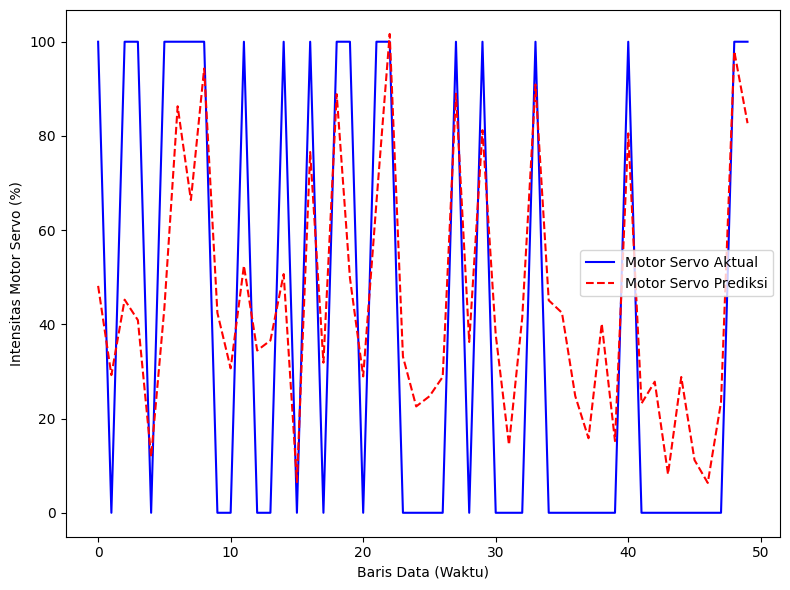

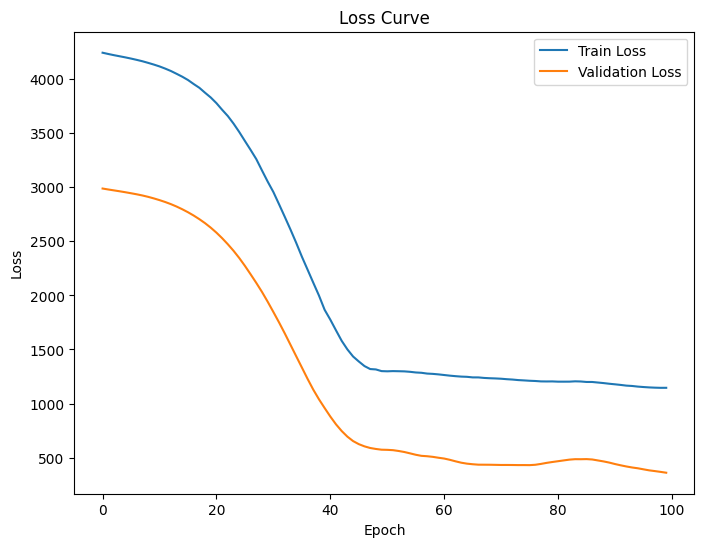

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 1. Membaca data
data = pd.read_csv('berat_pakan_dummy.csv')

# 2. Normalisasi data
scaler = StandardScaler()

# Menggunakan hanya kolom 'BeratPakan' sebagai fitur input
X = data[['BeratPakan']].values
y = data['MotorServo'].values

# Standarisasi input dan output
X_scaled = scaler.fit_transform(X)
y_scaled = y  # Asumsi output berada dalam rentang yang cukup baik (0-100), jika tidak bisa dinormalisasi juga

# 3. Membangun model neural network
model = Sequential([
    Dense(64, input_dim=1, activation='relu'),  # Lapisan pertama dengan 64 neuron
    Dense(128, activation='relu'),  # Lapisan kedua dengan 128 neuron
    Dense(64, activation='relu'),  # Lapisan ketiga dengan 64 neuron
    Dense(1, activation='linear')  # Output layer dengan aktivasi linear
])

# 4. Menyusun model dengan Adam optimizer dan MSE loss
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# 5. Melatih model
history = model.fit(X_scaled, y_scaled, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# 6. Menyimpan hasil prediksi
predictions = model.predict(X_scaled)

# 7. Menambahkan hasil prediksi ke data asli
data['MotorServo_Prediksi'] = predictions

# Menyimpan hasil ke file CSV
data.to_csv('output_data_motor_servo_nn.csv', index=False)

# 8. Visualisasi Hasil
plt.figure(figsize=(8, 6))
plt.plot(data.index, data['MotorServo'], label='Motor Servo Aktual', color='blue')
plt.plot(data.index, data['MotorServo_Prediksi'], label='Motor Servo Prediksi', color='red', linestyle='dashed')
plt.xlabel('Baris Data (Waktu)')
plt.ylabel('Intensitas Motor Servo (%)')
plt.legend()
plt.tight_layout()
plt.show()

# 9. Menampilkan loss history untuk evaluasi
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.2510 - val_loss: 0.2497
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2490 - val_loss: 0.2493
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2478 - val_loss: 0.2484
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2471 - val_loss: 0.2462
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2451 - val_loss: 0.2443
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2428 - val_loss: 0.2432
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2406 - val_loss: 0.2412
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2384 - val_loss: 0.2387
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2360 - val_loss: 0.2361
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2326 - val_loss: 0.2328
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2304 - val_loss: 0.2276
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2264 - val_loss: 0.2219
E

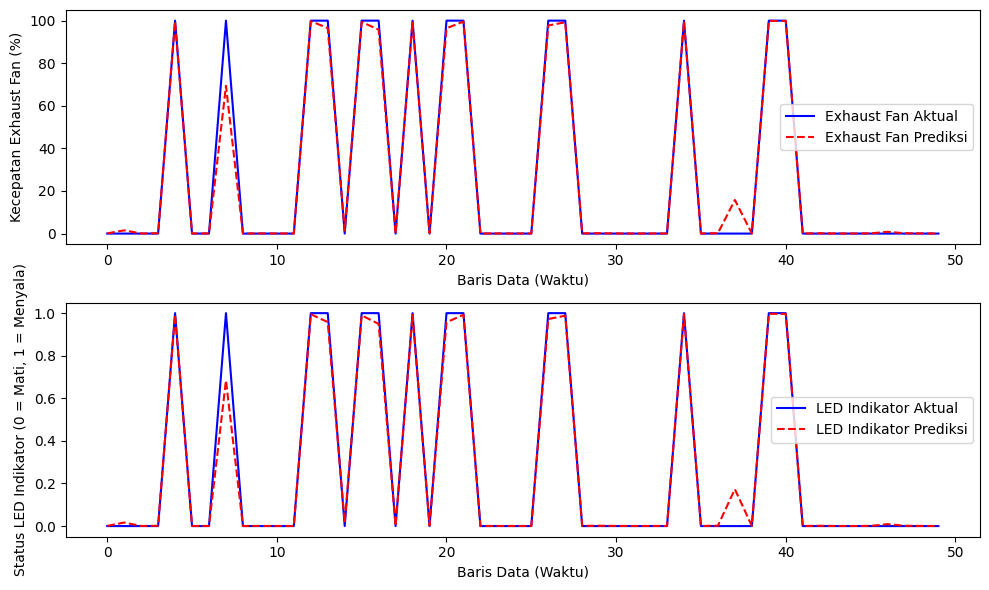

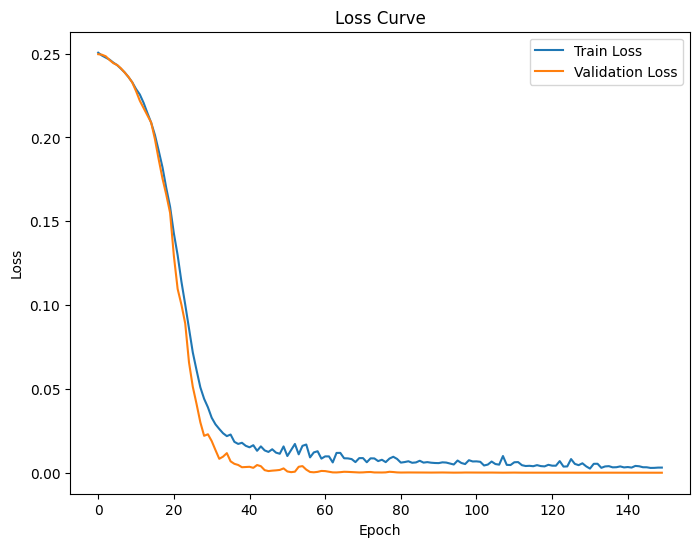

In [16]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data
data = pd.read_csv('gasammonia_dummy.csv')  # Sesuaikan dengan nama file Anda

# Normalisasi data input (GasAmmonia) dan output (ExhaustFan)
scaler_input = MinMaxScaler(feature_range=(0, 1))
scaler_output = MinMaxScaler(feature_range=(0, 1))

# Scaling untuk input (GasAmmonia) dan output (ExhaustFan)
data['GasAmmonia_Scaled'] = scaler_input.fit_transform(data[['GasAmmonia']])
data['ExhaustFan_Scaled'] = scaler_output.fit_transform(data[['ExhaustFan']])

# Memisahkan fitur (X) dan target (y) untuk pelatihan
X = data[['GasAmmonia_Scaled']].values
y = data[['ExhaustFan_Scaled', 'LEDIndikator']].values

# Membangun model neural network dengan lebih banyak lapisan
model = Sequential([
    Dense(128, input_dim=1, activation='relu'),  # Lapisan pertama dengan lebih banyak neuron
    Dense(256, activation='relu'),  # Lapisan kedua
    Dense(128, activation='relu'),  # Lapisan ketiga
    Dense(64, activation='relu'),  # Lapisan keempat
    Dense(2, activation='sigmoid')  # Output layer dengan 2 neuron (Exhaust Fan dan LED Indikator)
])

# Menyusun model dengan Adam optimizer dan MSE loss
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')

# Melatih model
history = model.fit(X, y, epochs=150, batch_size=16, validation_split=0.2, verbose=1)

# Menyimpan hasil prediksi
predictions = model.predict(X)

# Menambahkan hasil prediksi ke data asli
data['ExhaustFan_Prediksi'] = scaler_output.inverse_transform(predictions[:, 0].reshape(-1, 1))
data['LEDIndikator_Prediksi'] = predictions[:, 1]

# Menyimpan hasil ke file CSV
data.to_csv('output_data_gas_ammonia_nn.csv', index=False)

# Visualisasi Hasil
plt.figure(figsize=(10, 6))

# Plot Exhaust Fan
plt.subplot(2, 1, 1)
plt.plot(data.index, data['ExhaustFan'], label='Exhaust Fan Aktual', color='blue')
plt.plot(data.index, data['ExhaustFan_Prediksi'], label='Exhaust Fan Prediksi', color='red', linestyle='dashed')
plt.xlabel('Baris Data (Waktu)')
plt.ylabel('Kecepatan Exhaust Fan (%)')
plt.legend()

# Plot LED Indikator
plt.subplot(2, 1, 2)
plt.plot(data.index, data['LEDIndikator'], label='LED Indikator Aktual', color='blue')
plt.plot(data.index, data['LEDIndikator_Prediksi'], label='LED Indikator Prediksi', color='red', linestyle='dashed')
plt.xlabel('Baris Data (Waktu)')
plt.ylabel('Status LED Indikator (0 = Mati, 1 = Menyala)')
plt.legend()

plt.tight_layout()
plt.show()

# Menampilkan loss history untuk evaluasi
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
